In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
%config InlineBackend.figure_format = 'svg'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from yellowbrick.regressor import prediction_error

In [3]:
df = pd.read_csv('/content/mkhdata.csv')

In [ ]:
df

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,94805,Mecca,2017-01-01,00:00,2017,1,1,24,0,Clear,22,7,69.0,1016.0,16
1,94806,Mecca,2017-01-01,01:00,2017,1,1,1,0,Clear,21,0,73.0,1015.0,16
2,94807,Mecca,2017-01-01,02:00,2017,1,1,2,0,Clear,21,7,73.0,1015.0,16
3,94808,Mecca,2017-01-01,03:00,2017,1,1,3,0,Clear,21,7,73.0,1015.0,16
4,94809,Mecca,2017-01-01,04:00,2017,1,1,4,0,Clear,21,7,73.0,1015.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20263,115068,Mecca,2019-04-30,19:00,2019,4,30,19,0,Clear,32,15,43.0,1009.0,16
20264,115069,Mecca,2019-04-30,20:00,2019,4,30,20,0,Clear,31,15,46.0,1009.0,16
20265,115070,Mecca,2019-04-30,21:00,2019,4,30,21,0,Clear,30,19,49.0,1010.0,16
20266,115071,Mecca,2019-04-30,22:00,2019,4,30,22,0,Clear,30,15,49.0,1010.0,16


In [31]:
df.shape

(20268, 15)

In [32]:
df.dtypes

Unnamed: 0      int64
city           object
date           object
time           object
year            int64
month           int64
day             int64
hour            int64
minute          int64
weather        object
temp            int64
wind            int64
humidity      float64
barometer     float64
visibility      int64
dtype: object

In [4]:
df_Train, df_test = train_test_split(df, test_size=0.2, random_state= 30)

df_train, df_val = train_test_split(df_Train, test_size=0.2, random_state= 30)

In [5]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (12971, 15)
Shape of validation: (3243, 15)
Shape of test: (4054, 15)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout ,BatchNormalization
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.initializers import RandomNormal, Constant

In [ ]:
# # Build the LSTM Stack model
#model=Sequential()
# Adding first LSTM layer
#model.add(LSTM(150,return_sequences=True,input_shape=(100,1)))
#model.add(Dropout(0.2)) # Dropout regularisation
# second LSTM layer 
#model.add(LSTM(150,return_sequences=True))
# Adding third LSTM layer 
#model.add(LSTM(150, return_sequences=True))
#model.add(Dropout(0.2))
# Adding fourth LSTM layer
#model.add(LSTM(150))
#model.add(Dropout(0.2))
# Adding the Output Layer
#model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 150)          91200     
                                                                 
 dropout (Dropout)           (None, 100, 150)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 150)          180600    
                                                                 
 lstm_2 (LSTM)               (None, 100, 150)          180600    
                                                                 
 dropout_1 (Dropout)         (None, 100, 150)          0         
                                                                 
 lstm_3 (LSTM)               (None, 150)               180600    
                                                                 
 dropout_2 (Dropout)         (None, 150)               0

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

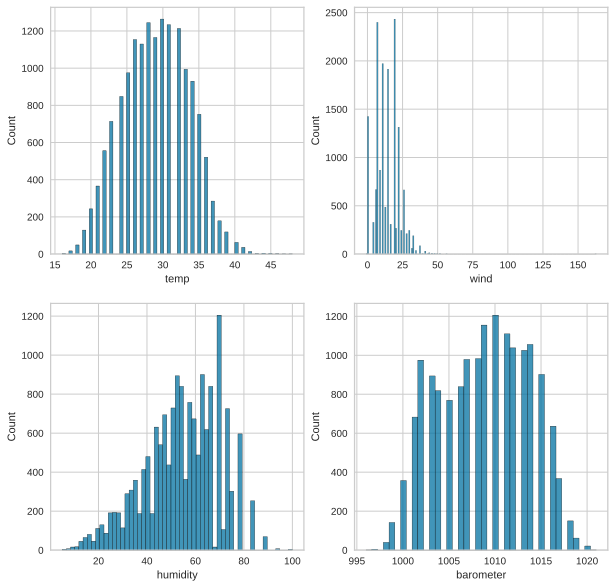

In [9]:
cols_to_plot = ['temp', 'wind', 'humidity', 'barometer']
plt.figure(figsize=(10, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df_Train, x=col)

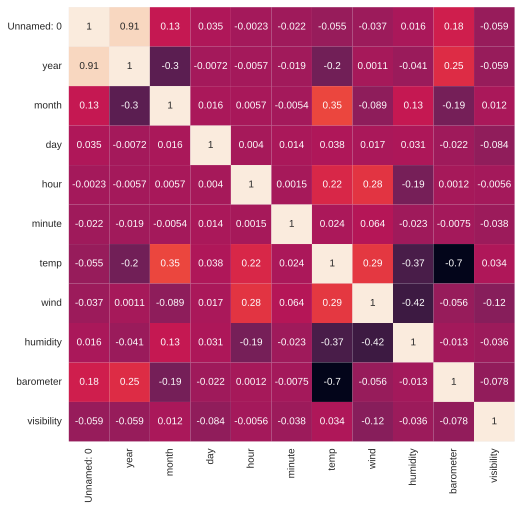

In [19]:
#Plot the correlation heatmap
corr_matrix = df_Train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

In [20]:
import plotly.express as px

In [29]:
X_train = df_train.drop(["temp"], axis = 1)
y_train = df_train["temp"]

In [30]:
lm = LinearRegression().fit(X_train,y_train)
lm.score(X_train,y_train)

ValueError: ignored